# Experiments on ImageNette

10 easy classes from ImageNet.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from fastai.vision import *
from octxresnet import *

## Get Data

In [2]:
path = untar_data(URLs.IMAGENETTE)

In [3]:
bs, size = 16, 256

data = (ImageList.from_folder(path).split_by_folder(valid='val')
            .label_from_folder().transform(([flip_lr(p=0.5)], []), size=size)
            .databunch(bs=bs)
            .presize(size, scale=(0.35,1))
            .normalize(imagenet_stats))

## Normal Xresnet

In [4]:
model = models.xresnet50(pretrained=False, num_classes=10)

In [5]:
sum(p.numel() for p in model.parameters())

23547754

In [6]:
learn = Learner(data, model, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


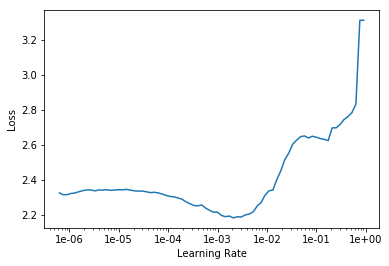

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.421357,1.181638,0.624000,03:51
1,1.097146,1.118086,0.652000,03:52
2,0.937313,0.738538,0.790000,03:52
3,0.701264,0.562039,0.832000,03:52
4,0.701980,0.473122,0.854000,03:52


In [9]:
learn.save('xresnet_imagenette')

## Oct-Xresnet

In [10]:
model = octxresnet50(0.125, c_out=10).cuda()

In [11]:
sum(p.numel() for p in model.parameters())

23547754

In [12]:
learn = Learner(data, model, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


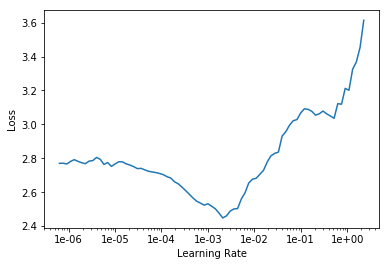

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.484770,1.322260,0.568000,09:22
1,1.141019,1.066825,0.680000,09:23
2,0.961678,0.754495,0.754000,09:22
3,0.798970,0.615624,0.824000,09:22
4,0.725958,0.585941,0.840000,09:23


In [15]:
learn.save('octxresnet_imagenette')